# Project Motivation
For this project, I was interestested in using Stack Overflow data from 2017 to better understand:

1. Which Countries People embrace work from Home Most?
2. Is the developer’s salary related to their activity level on Stack Overflow?
3. Is the status of the user account related to user behavior? 

#  Data Understanding
In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('./survey_results_public.csv')
df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


The data in the survey_results_public.csv is the result of the survey, with a total of 154 columns. Save it in df.



In [5]:
df_info=pd.read_csv('survey_results_schema.csv')
df_info.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


The file survey_results_schema.csv provides survey schema, i.e., the questions that correspond to each column name. Save it in df_info.



# Assess Data
The following cells checks number of columns, missing values, etc to better understand the data we have.

In [6]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [7]:
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

# Question1: Which Countries People embrace work from Home Most?
## 1. Gather Neccesary Data

To answer this question, I will

1. Look at HomeRemote and Country column
2. Calculate the proporition of work from home respondents for each country
3. Create a bar plot to show the results

# Prepare Data for Question 1
The following cells prepare data to answer the first question. The data are cleaned, missing values are handled, and new feature columns are derived.

1. There is no missing value in Country column.
2. A new column WorkFromHome is created based on a categorical variable HomeRemote using the following logic:

True: "About half the time", "All or almost all the time (I'm full-time remote)","More than half, but not all, the time", "Less than half the time, but at least one day each week"

False: 'Never', 'A few days each month', or missing values

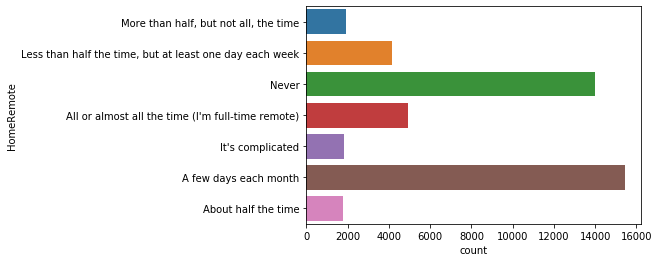

In [8]:
sns.countplot(y='HomeRemote',data=df)

In [9]:
#Drop the row of Nan value in Columns HomeRemote or Country
df_WFH=df.dropna(subset=['HomeRemote','Country'],axis=0)

In [10]:
#Drop the row if it has It's complicated in HomeRemote Column
df_WFH=df_WFH[(df_WFH['HomeRemote']!="It's complicated")]

In [11]:
df_WFH['HomeRemote'].unique()


array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       'A few days each month', 'About half the time'], dtype=object)

In [12]:
#Drop the row if Country has less than 300 responents because we want top country 
country_count=df_WFH['Country'].value_counts()
country_count=country_count[country_count>=300]
countries=list(country_count.index)

In [13]:
df_WFH=df_WFH[df_WFH['Country'].isin(countries)]

In [14]:
# Add new column WorkFromHome for Responents Response
df_WFH['WorkFromHome']=df_WFH['HomeRemote'].isin(['About half the time', 
                                                     "All or almost all the time (I'm full-time remote)",
                                                     "More than half, but not all, the time",
                                                     "Less than half the time, but at least one day each week"])

In [15]:
df_WFH['WorkFromHome'].isna().sum()

0

## Model/Analyze Data for Question 1

The proporition of respondents who work from home is calculated for each country. The results are sorted in descending order, so that the countries with highest proportion of work from home developers are at the top of the list.

In [16]:
country_WFH=df_WFH.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending=False)

In [17]:
country_WFH

Country
Iran                  0.521635
Pakistan              0.464183
Czech Republic        0.401709
Ukraine               0.393548
Russian Federation    0.381699
Mexico                0.352564
United States         0.325871
Italy                 0.315705
India                 0.312774
Brazil                0.311927
Australia             0.294679
Poland                0.293040
Romania               0.266667
Canada                0.259504
South Africa          0.254658
Israel                0.253579
Spain                 0.250000
Netherlands           0.249284
United Kingdom        0.240164
France                0.238950
Germany               0.223456
Austria               0.216080
Belgium               0.206587
Switzerland           0.192308
Sweden                0.179134
Name: WorkFromHome, dtype: float64

## Visialize Results for Question 1
A bar chart is generated based on the analysis results. 

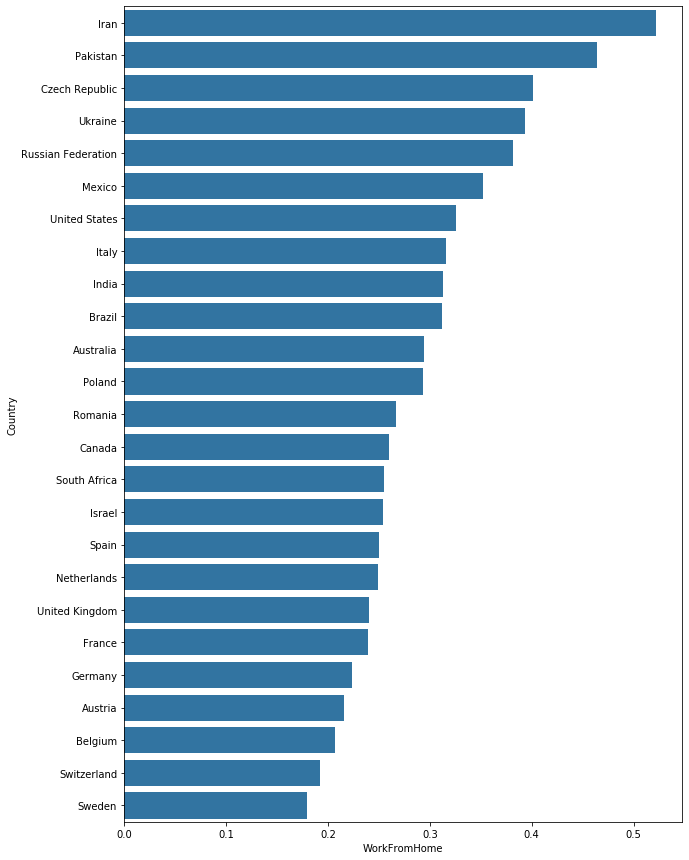

In [18]:
plt.figure(figsize=(10,15))
sns.barplot(y=country_WFH.index,x=country_WFH,color=sns.color_palette()[0])

In [19]:
df_WFH['WorkFromHome'].mean()

0.28938963284203123

### Observation for Question 1
Work from Home is More popular in these Contries:Iran,Pakistan,Czech Replubic, Ukraine,Russian Federation,Mexico,United States,
Italy,India,Brazil etc.



# Question 2 Is the developer’s salary related to their activity level on Stack Overflow?


## 1.  Gather necessary data

Let's look at column StackOverflowDescribes to see how many respondents have registered and filled out their personal information on StackOverflow.

In [20]:
Describes=df.StackOverflowDescribes.value_counts(dropna=False).reset_index()
Describes.rename(columns={'StackOverflowDescribes':'count'},inplace=True)
Describes['Perct']=Describes['count']/np.sum(Describes['count'])
Describes

,index,count,Perct
0,"I have a login for Stack Overflow, but haven't...",19696,0.383250
1,NaN,14460,0.281367
2,I have created a CV or Developer Story on Stac...,8906,0.173295
3,"I've visited Stack Overflow, but haven't logge...",8012,0.155900
4,I'd never heard of Stack Overflow before today,196,0.003814
5,"I've heard of Stack Overflow, but have never v...",122,0.002374


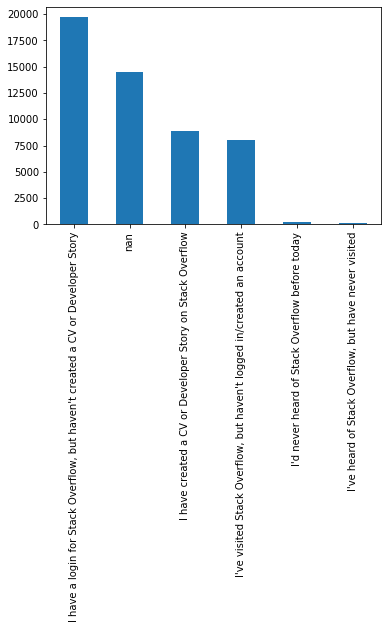

In [21]:
df.StackOverflowDescribes.value_counts(dropna=False).plot(kind='bar')


About 38% of respondents have a login for Stack Overflow, but haven't created a CV or Developer Story and 17% of them have created a CV or Developer Story on Stack Overflow. This part accounts for 56% of the respondents ,approximately 28% of the data is missing.

But registration is only the first step. Next we will study activity level on StackOverflow.The survey include user activities, including finding answers, copying code, searching job, asking questions,answering questions, and participating in discussions.

In [23]:
columns_active = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 
                    'StackOverflowJobListing', 'StackOverflowCompanyPage', 
                    'StackOverflowJobSearch', 'StackOverflowNewQuestion', 
                    'StackOverflowAnswer', 'StackOverflowMetaChat']

data_type = {}
for col in columns_active:
    data_type[col] = df[col].unique()

data_type

{'StackOverflowFoundAnswer': array(['At least once each week', 'Several times', 'Once or twice', nan,
        'At least once each day', "Haven't done at all"], dtype=object),
 'StackOverflowCopiedCode': array(["Haven't done at all", 'Several times', nan, 'Once or twice',
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowJobListing': array(['Once or twice', "Haven't done at all", 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowCompanyPage': array(["Haven't done at all", 'Once or twice', 'Several times', nan,
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowJobSearch': array(["Haven't done at all", 'Once or twice', 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowNewQuestion': array(['Several times', "Haven't done at all", nan, 'Once or twice',
        'At least once each wee

According to datatype, we know that: The data is categorical data and each column has missing data so Replace the frequency with a number.The numbers represent activity level and are divided into 0, 1, 2, 3 and 4. It is not a true frequency ,Replace the missing value with 0.

There are two reasons for choosing this method.First, the respondent did not answer the question most likely because he did not use StackOverflow. Second, I don't want to overestimate the activeness of the respondents.

In [26]:
replace_dict = {"Haven't done at all": 0, "Once or twice": 1, "Several times": 2, 
                "At least once each week": 3, "At least once each day": 4}

active_df = df[columns_active].copy()
for col in columns_active:
    active_df[col].replace(replace_dict, inplace=True)
active_df.fillna(0, axis=0, inplace=True)    
active_df[columns_active].head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Adding the Salary column in df to active_df is what we need for the question 2.

In [27]:
#Adding a salary column in df to active_df for getting responents activity
active_df['Salary'] = df['Salary']
active_df.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,NaN
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,113750.0
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


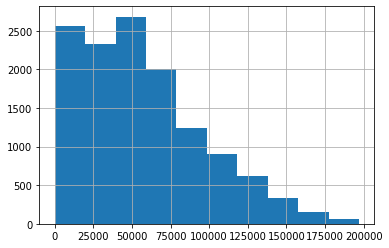

In [28]:
#draw a histogram of salary column
active_df['Salary'].hist()

this graph shows the distribution of  respondents salary

# 2. Handle missing data


In [30]:
# view the average of missing value and number of rows without missing missing values in salary Column
print(active_df['Salary'].isnull().mean())
print(active_df['Salary'].notnull().sum())

0.7491632938978829
12891


75% values of Salary Column of dataframe active_df are missing and delete these rows except 12891 rows

In [31]:
#drop the missing values rows in active_df
active_dropna = active_df.dropna()
active_dropna.describe()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
count,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000
mean,2.337367,1.173920,0.624777,0.310682,0.416182,0.433481,0.604996,0.190676,56298.480641
std,1.152654,1.069431,0.893040,0.679908,0.776007,0.707365,0.897140,0.565995,39880.905277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26440.371839
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000
75%,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,80000.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,197000.000000


# 3. Analyze and Visualize


(9.0, 0.0)

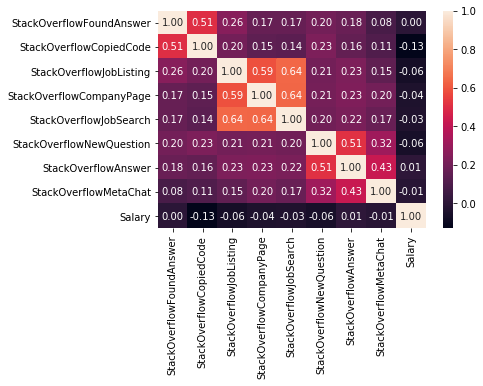

In [27]:
ax=sns.heatmap(active_dropna.corr(), annot=True, fmt=".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# Observation of Question 2
The correlation coefficient between salary and activity is small between -0.13 and 0.01.But the correlation within the three types of behavior is relatively high. For example, the correlation coefficient for proposing new questions and answering questions is 0.51, and the correlation coefficient with Meta is 0.31. Users who like to ask questions on StackOverflow are more likely to answer questions and participate in community discussions on meta or in chat.

I proposed a new indicator, the active index, which is defined as the sum of the activity of the eight behaviors. The maximum value of the respondent's activity index is 32. Respondents with an activity index ranging from 3 to 6 accounted for the highest proportion.

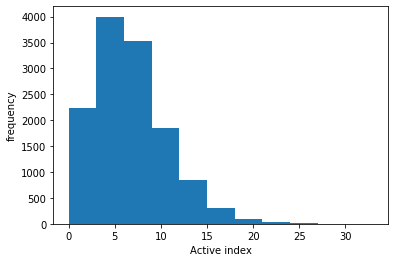

In [28]:
active_dropna2 = active_dropna.copy()
active_dropna2['Active index'] = active_dropna[columns_active].sum(axis=1)
plt.hist(active_dropna2['Active index'], bins=11, range=(0,33))
plt.xlabel('Active index')
plt.ylabel('frequency')
plt.show()

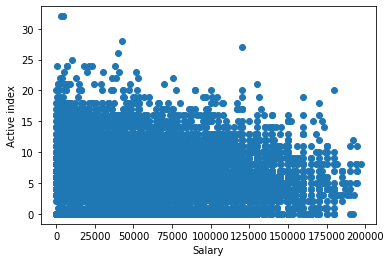

In [29]:
plt.scatter(active_dropna2['Salary'], active_dropna2['Active index'])
plt.xlabel('Salary')
plt.ylabel('Active index')
plt.show()

This scatter plot shows that there is no linear relationship between Active index and Salary

# Question 3 Is the status of the user account related to user behavior? 

## 1. Gather Necessary Data 

Through the StackOverflowDescribes column in df, we can classify the user account states that have used Stack Overflow into three categories:

1. I've visited Stack Overflow, but haven't logged in/created an account
2. I have a login for Stack Overflow, but haven't created a CV or Developer Story
3. I have created a CV or Developer Story on Stack Overflow
According to the above serial number, they are respectively referred to as the first class, the second class and the third class of users.

And adding the StackOverflowDescribes column in df to active_df is what we need for the third problem.

In [34]:
active_df_info = active_df.copy()
active_df_info['Describes'] = df['StackOverflowDescribes']
active_df_info.drop('Salary', axis = 1, inplace=True)
active_df_info.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Describes
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,I have created a CV or Developer Story on Stac...
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,I have created a CV or Developer Story on Stac...
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,I have created a CV or Developer Story on Stac...
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0,I have created a CV or Developer Story on Stac...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## 2.Handle Missing Value

In [39]:
print(active_df_info['Describes'].isnull().mean())
print(active_df_info['Describes'].notnull().sum())

0.0
36932


only 28% values are missing values in Describes column and I delete these rows except 36932 rows because there is no other way to replace

In [40]:
active_df_info.dropna(inplace=True)


In [41]:
Describes_list = active_df_info['Describes'].unique()


I filter the data of the three types of respondents according to the status of the account

In [42]:
active_avg = []
for des in Describes_list:
    list1 = []
    for col in columns_active:
        list1.append(active_df_info[active_df_info['Describes'] == des][col].mean())
    active_avg.append(list1)

## 3. Analyze and Visualize

Finally, the activity curve of the three types of respondents is drawn.



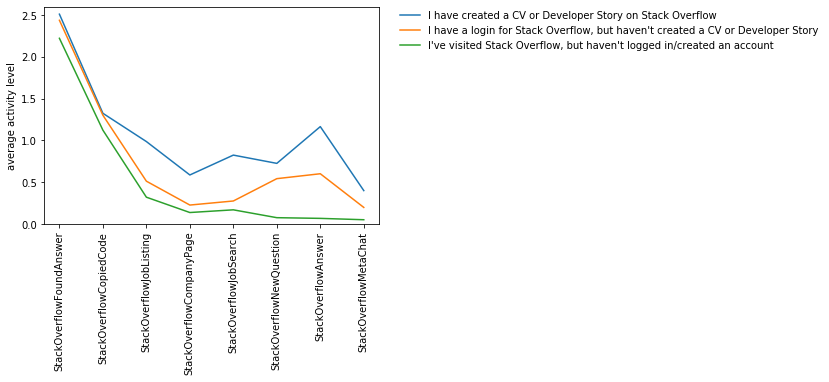

In [43]:
for i in range(len(active_avg[0:3])):
    plt.plot(list(range(len(columns_active))), active_avg[i], label=Describes_list[i])
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=1)
plt.xticks(list(range(len(columns_active))), columns_active, rotation=90)
plt.ylabel('average activity level')
plt.ylim([0, 2.6])
plt.show()

# Observation of Question 3

Above plot shows 
1. the frequency of finding answers and copying codes on the website is not much different.
2. The second class and the third class of users are not active in the behavior related to job hunting. However, the activity   of the first type of users is significantly higher.
3. The frequency of the third class users participating in content creation is very low. The second class of users are more active. The first class of users is the most active.

According to the second point, it can be speculated that when a user's account creates a CV or developer story, he is more likely to find a job on Stack Overflow. This provides an idea for ad serving to show users some job ads that match their profile.

The main findings of the code can be found at the post available [here](https://medium.com/new-story)